<h2>ARTIFICIAL INTELLIGENCE FOUNDAMENTALS PROJECT 2023-24</h2>

<h4><span style="color:lightblue">Github link</span>: https://github.com/tommasoDR/AIF-23-Project</h4>


<a href="https://colab.research.google.com/github/tommasoDR/AIF-23-Project/blob/testing/notebooks/report.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h4>INTRODUCTION</h4>

This project is centered around developing intelligent algorithms for agents to navigate through partially observable environments with optimal reasoning. The primary focus involves implementing an advanced exploration algorithm, based on A*, to enable the agent to effectively address our objectives. The agent's goal is to navigate sensibly within randomly generated rooms. It has to identify specific objects to recognize different room types, locate the target object and reach it. We used NetHack as the foundational framework for this project, offering a rich and complex environment for the development and testing of intelligent exploration algorithms.<br>
In the following we’re going to explain the algorithms, the heuristics and the optimizations that let the  agent to solve smartly this simple task on a random generated map in MiniHack environment.


<h4>RELATED WORKS</h4>

For generating the random environment in which the agent perform our smart algorithms we used MiniHack and gym libraries.<br>
[MiniHack](https://minihack.readthedocs.io/en/latest/getting-started/interface.html) is a software tool tailored for AI experimentation. It provides a simplified version of NetHack Learning Environment (NLE) with reduced complexity. It offers a controlled environment for training and testing AI agents and algorithms.<br>
[Gym]( https://www.gymlibrary.dev/index.html), by OpenAI, is a toolkit for reinforcement learning that provides a standardized interface for various environments, including MiniHack. In this collaboration, Gym acts as a bridge, allowing AI agents to interact with MiniHack through its standardized interface. By initializing Gym and MiniHack in our Python environment, we  develop an AI agents that exploit optimized searching algorithm for perform our task in a controlled environment. This setup enables efficient experimentation and algorithm refinement for AI tasks within MiniHack.<br>
For creating room shapes and for choosing objects and agent we check for [NetHackWiki](https://nethackwiki.com/wiki/Main_Page).
For room exploration we decide to implement an A* version with some optimizations. For A* implementation we exploit the [AIMA documentation](https://github.com/yanshengjia/ml-road/blob/master/resources/Artificial%20Intelligence%20-%20A%20Modern%20Approach%20(3rd%20Edition).pdf) while the heuristics and the optimizations are created by us for letting A* to perform well in a partial observable environment.


<h4>MAIN TASK</h4>

<h4>Exploration </h4>



In [1]:
import warnings
import os
import sys

warnings.filterwarnings('ignore')
current_dir = %pwd

# Detect the parent directory dynamically
parent_dir = os.path.abspath(os.path.join(current_dir, '..'))
#print(parent_dir)
sys.path.append(parent_dir)


KeyboardInterrupt: 

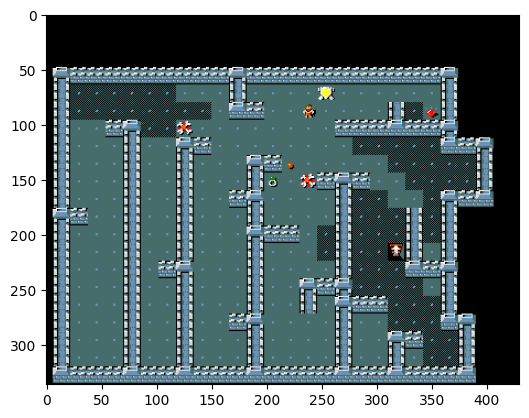

In [2]:
from src.explore_room import *

env, goals_info = generate_env()

guessed_room, _, _, _ = exhaustive_exploration(env.reset(), env)

if goals_info[guessed_room][3] == 'uncursed':
    print("Win")
else:
    print("Lose")

<h4>Find a new target during the exploration</h4>
At each iteration of the exploration phase a new target is defined. The target represents the next cell that the agent will have to reach. Initially, all cells that the agent has yet to explore are considered as candidates to become the new target. For each of these candidate cells, an heuristic is calculated based on the current position of the agent. The cell with the best value of the heuristic becomes the new target.

The heuristic used for target selection is the TFFFM, specifically developed by us for our exploration problem. TFFFM computes the Manhattan distance between the agent's position and the target and then adds a penalty term for each wall between the two cells following the founded path. This heuristic allows choosing as new target a cell that is as close as possible to the agent's position while penalizing paths that involve traversing walls.


<h4>Conditioned map</h4>
During the exploration, at each iteration, the A* algorithm is invoked for finding the shortest path between the agent position and a selected target. Instead of the original game map, A* operates on a pre-conditioned map created by us. The pre-conditioned map is generated by adding "fake walls" along all paths adjacent to the walls, ensuring that these additions do not block any path.
The A* algorithm working on the conditioned map returns a path constantly one cell away from the walls of the original game map. Since the agent can perceive adjacent cells, moving to a cell next to the wall would be unnecessary, as it can still be observed with one step less.
Therefore, the conditioned map allows visiting the entire area while reducing the number of unnecessary cells to traverse.


<h4>A* optimization</h4>

During exploration, there are cases where calling A* is unnecessary since the path is simply a straight line between the two cells (agent position and target). These instances can be easily detected by checking the coordinates of the two cells. When this case is identified, A* is not executed; instead, the algorithm simply returns the path that corresponds to a straight line from agent position to target. 
This optimization reduces the number of calls to A*, thereby improving the algorithm's performance in time and space.

<h4>TEST</h4>

Mainly, four different tests have been performed to evaluate the performance and correctness of our improvements. All the tests were run on the map with the most complex pattern. All results that will be shown are taken as average on 1000 runs, starting from a random location in the chosen map. The first test consists regards the comparison of the number of steps taken by the agent to explore the entire map when using different distances in the customized A* implementation. As we can see from the graph below, the number of steps taken by the agent is comparable between all the different distances, with a slight advantage for the TFFFM distance. This result is expected since this custom distance is the most accurate for our problem, as it is the only one that adds a penalty term when considering the walls between the agent and the target, namely the closest unvisited cell in the maze. The other distances, instead, are affected by the presence of walls, which can lead to suboptimal paths. 


<div style="display: flex; justify-content: space-between;">
  <figure>
    <img src="https://drive.google.com/uc?id=1s-AYZ-rJHYl49Txn0Lv8gaFjEaiODk00" width="300" height="200">
    <figcaption></figcaption>
  </figure>
</div>

In the second experiment we compared the number of unexplored cells at the end of the exploration phase when using different distances in the customized A* implementation. By interpreting the graph shown below, the difference between the number of unexplored cells is almost indistinguishable between the different distances. This result is expected since the number of unexplored cells is mainly affected by the exploration algorithm, which is the same for all the distances.

<div style="display: flex; justify-content: space-between;">
  <figure>
    <img src="https://drive.google.com/uc?id=18xilVVTwrLxN5-to13F0drzuhkpZRTzT" width="300" height="200">
    <figcaption></figcaption>
  </figure>
</div>

On the same line of this experiment we evaluated how many times the agent steps over the cells in an exploration of the map. Considering the TFFFM and Manhattan distance and fixing the probability threshold to 100% to let the exploration be exhaustive, we can see that the number of times the agent passes on cells in general is lower for the TFFFM distance, which is more accurate than the Manhattan distance for this task.

<div style="display: flex; justify-content: space-between;">

  <figure>
    <img src="https://drive.google.com/uc?id=1vYuFTjCNKDJRhD613Nv_O3BEODreXv1s" width="300" height="200">
    <figcaption>Heatmap without optimizations</figcaption>
  </figure>

  <figure>
    <img src="https://drive.google.com/uc?id=1EK1abS9goekQpssDXse5FRNh_wQFMhua" width="300" height="200" >
    <figcaption>Heatmap with optimizations</figcaption>
  </figure>

</div>


The last test is basically evaluating the success rate of the agent, namely the relative number of times the agent reaches the target object, according to its confidence of being in the correct room. The agent looses if the picked up object is cursed and wins if it is not. For this experiment we do not have a plot to show, but just a number that represents the success rate of the agent. The success rate is 0.989, which means that the agent is able to reach the correct target object in 98.9% of the cases. This result is expected since the exploration algorithm is exhaustive and the agent is able to reach the target object in the majority of the cases.


<h4>CONCLUSIONS</h4>